## Loan Approval Prediction Using Machine Learning

## Objective:
* To develop a machine learning model that predicts loan approval status based on applicant demographic information, financial attributes, and loan details. The goal is to assist financial institutions in assessing loan applications more efficiently and accurately, minimizing the risk of defaults while maximizing approval rates for eligible applicants.

## Problem Statement:
* Predict loan approval based on applicant details using machine learning.Predict loan approval based on applicant details using machine learning.
* Analyze financial and credit history to minimize default risk.
* Reduce manual effort and speed up loan approvals.
* Ensure unbiased and accurate loan approval decisions.

### Import libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

### Load Dataset

In [5]:
loan =pd.read_csv(r"C:\Users\skula\Downloads\archive (9)\loan_dataset.csv")

### First 5 rows

In [6]:
loan.head(5)

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### Shape of dataset

In [4]:
loan.shape

(45000, 14)

### Column Descriptions

In [5]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

### Removed unwanted columns

In [5]:
loan.drop(columns=['person_home_ownership', 'person_emp_exp' ], axis=1, inplace=True)

In [7]:
loan.head()

,person_age,person_gender,person_education,person_income,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


### datatypes 

In [8]:
loan.dtypes

person_age                        float64
person_gender                      object
person_education                   object
person_income                     float64
loan_amnt                         float64
loan_intent                        object
loan_int_rate                     float64
loan_percent_income               float64
cb_person_cred_hist_length        float64
credit_score                        int64
previous_loan_defaults_on_file     object
loan_status                         int64
dtype: object

In [9]:
loan.columns

Index(['person_age', 'person_gender', 'person_education', 'person_income',
       'loan_amnt', 'loan_intent', 'loan_int_rate', 'loan_percent_income',
       'cb_person_cred_hist_length', 'credit_score',
       'previous_loan_defaults_on_file', 'loan_status'],
      dtype='object')

### finding null values

In [10]:
loan.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [11]:
loan.isnull().mean()*100

person_age                        0.0
person_gender                     0.0
person_education                  0.0
person_income                     0.0
loan_amnt                         0.0
loan_intent                       0.0
loan_int_rate                     0.0
loan_percent_income               0.0
cb_person_cred_hist_length        0.0
credit_score                      0.0
previous_loan_defaults_on_file    0.0
loan_status                       0.0
dtype: float64

### duplicates finding

In [12]:
loan.duplicated().sum()

0

### Understanding data distribution

In [13]:
loan.describe()

,person_age,person_income,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


### Import sklearn libraries

In [19]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Removing outliers by Function Transformer

In [7]:
new_col=[ 'person_age','person_income', 'loan_amnt',
         'loan_int_rate', 'loan_percent_income', ]

In [8]:
ft= FunctionTransformer(func=np.log1p)
ft.fit(new_col)

FunctionTransformer(func=<ufunc 'log1p'>)

In [9]:
loan[new_col]=ft.fit_transform(loan[new_col])

In [10]:
loan.head()

,person_age,person_gender,person_education,person_income,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,3.135494,female,Master,11.183713,10.463132,PERSONAL,2.834389,0.398776,3.0,561,No,1
1,3.091042,female,High School,9.415971,6.908755,EDUCATION,2.496506,0.076961,2.0,504,Yes,0
2,3.258097,female,High School,9.428592,8.612685,MEDICAL,2.629728,0.364643,3.0,635,No,1
3,3.178054,female,Bachelor,11.286702,10.463132,MEDICAL,2.786861,0.364643,2.0,675,No,1
4,3.218876,male,Master,11.099469,10.463132,MEDICAL,2.725890,0.425268,4.0,586,No,1


### Convert categorical to numerical

In [11]:
new_obj= ['person_gender','person_education', 'loan_intent', 'previous_loan_defaults_on_file']
new_obj

['person_gender',
 'person_education',
 'loan_intent',
 'previous_loan_defaults_on_file']

In [12]:
lb= LabelEncoder()
for col in new_obj:
    loan[col] = lb.fit_transform(loan[col])

In [21]:
loan.head(3)

,person_age,person_gender,person_education,person_income,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,3.135494,0,4,11.183713,10.463132,4,2.834389,0.398776,3.0,561,0,1
1,3.091042,0,3,9.415971,6.908755,1,2.496506,0.076961,2.0,504,1,0
2,3.258097,0,3,9.428592,8.612685,3,2.629728,0.364643,3.0,635,0,1


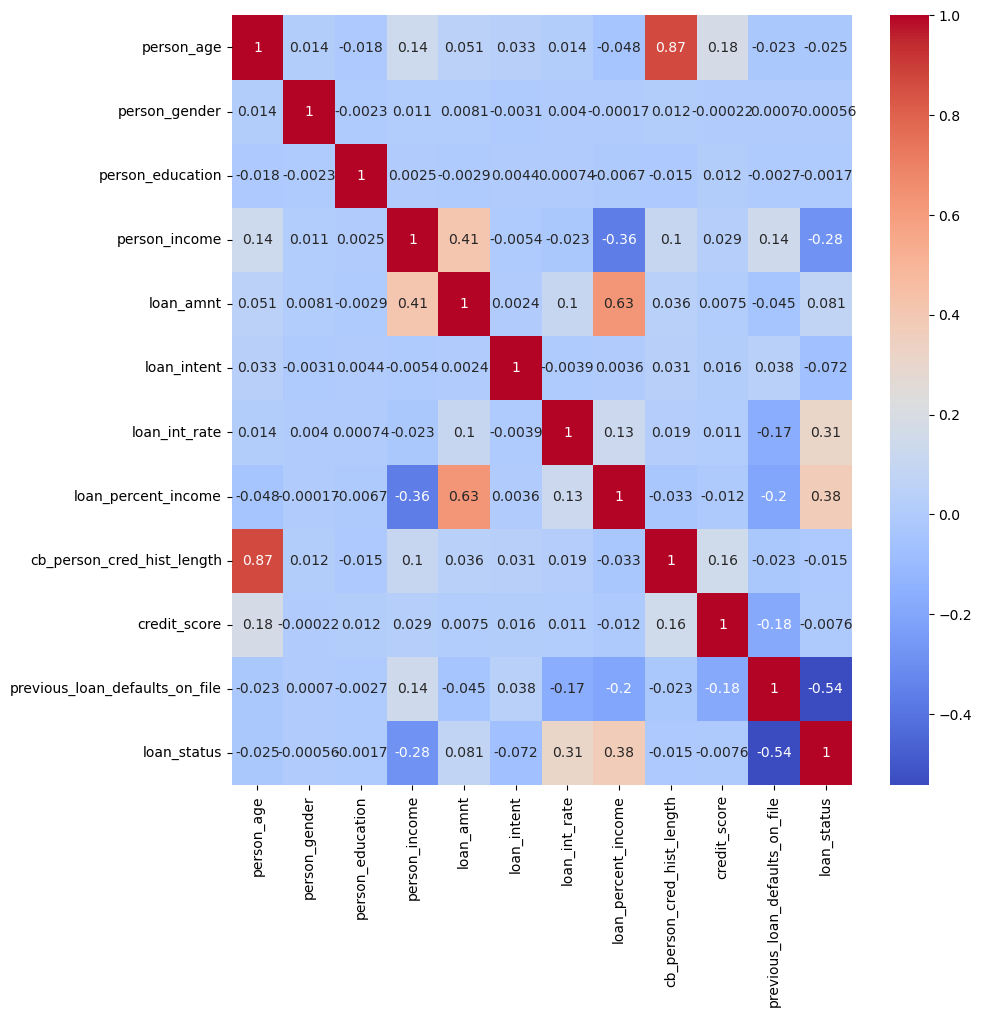

In [22]:
plt.figure(figsize=(10,10))
sns.heatmap(loan.corr(),annot=True, cmap="coolwarm")
plt.show()

### Spliting dataset into X and Y variables

In [13]:
x = loan.drop(columns=['loan_status'])
y = loan['loan_status']

In [14]:
y.shape

(45000,)

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

### Logistic Regression

In [16]:
lr= LogisticRegression(random_state=42)
lr.fit(x_train, y_train)

C:\Users\skula\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [17]:
y_pred = lr.predict(x_test)

In [18]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print('accuracy', accuracy)
print('classification_rep', classification_rep)

accuracy 0.876
classification_rep               precision    recall  f1-score   support

           0       0.92      0.92      0.92      6990
           1       0.73      0.71      0.72      2010

    accuracy                           0.88      9000
   macro avg       0.82      0.82      0.82      9000
weighted avg       0.87      0.88      0.88      9000



### Decision Tree

In [38]:
dt=DecisionTreeClassifier(max_depth=10)
dt.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10)

In [39]:
dt_pred = dt.predict(x_test)
accuracy = accuracy_score(y_test, dt_pred)
classification_rep = classification_report(y_test, dt_pred)

print('accuracy', accuracy)
print('classification_rep', classification_rep)

accuracy 0.9017777777777778
classification_rep               precision    recall  f1-score   support

           0       0.93      0.95      0.94      6990
           1       0.81      0.74      0.77      2010

    accuracy                           0.90      9000
   macro avg       0.87      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000



In [32]:
dt.score(x_train, y_train)*100

92.39166666666667

In [33]:
dt.score(x_test, y_test)*100

90.21111111111111

### Random Forest

In [29]:
rc= RandomForestClassifier(n_estimators=100 , max_depth=10, random_state=42)
rc.fit(x_train, y_train)

RandomForestClassifier(max_depth=10, random_state=42)

In [30]:
rc.score(x_train, y_train)*100

92.33888888888889

In [31]:
rc.score(x_test, y_test)*100

90.86666666666666

In [32]:
rc_pred = rc.predict(x_test)

In [33]:
accuracy = accuracy_score(y_test, rc_pred)
classification_rep = classification_report(y_test, rc_pred)

print('accuracy', accuracy)
print('classification_rep', classification_rep)

accuracy 0.9086666666666666
classification_rep               precision    recall  f1-score   support

           0       0.93      0.96      0.94      6990
           1       0.83      0.74      0.78      2010

    accuracy                           0.91      9000
   macro avg       0.88      0.85      0.86      9000
weighted avg       0.91      0.91      0.91      9000



### KNN

In [24]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [25]:
print(knn.score(x_train, y_train), knn.score(x_test, y_test))

0.8136111111111111 0.7913333333333333


In [26]:
knn_pred= knn.predict(x_test)

In [27]:
accuracy = accuracy_score(y_test, knn_pred)
classification_rep = classification_report(y_test, knn_pred)

print('accuracy', accuracy)
print('classification_rep', classification_rep)

accuracy 0.7913333333333333
classification_rep               precision    recall  f1-score   support

           0       0.79      0.99      0.88      6990
           1       0.70      0.11      0.20      2010

    accuracy                           0.79      9000
   macro avg       0.75      0.55      0.54      9000
weighted avg       0.77      0.79      0.73      9000



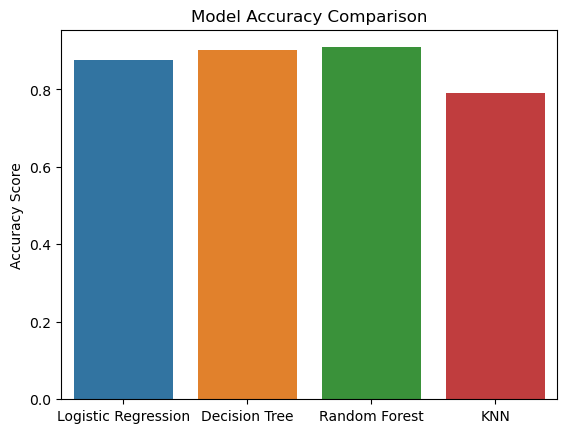

In [37]:
models = {'Logistic Regression': lr,'Decision Tree': dt, 'Random Forest': rc, 'KNN': knn}
scores = {name: accuracy_score(y_test, model.predict(x_test)) for name, model in models.items()}
sns.barplot(x=list(scores.keys()), y=list(scores.values()))
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy Score")
plt.show()
